<a href="https://colab.research.google.com/github/DAPLearning2025/materials/blob/main/Unsupervis_L_edLearning_ClusteringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Different families of clustering algorithms
  1. Hierarchical Clustering
  2. Centroid-based Clustering
  3. Distribution-based Clustering
  4. Density-based Clustering
2. Choosing the right clustering algorithm
  1. Data Size
  2. Number of Desired Clustering
3. K-means clustering (Numerical data)
4. Hierarchical Clustring (Image data)

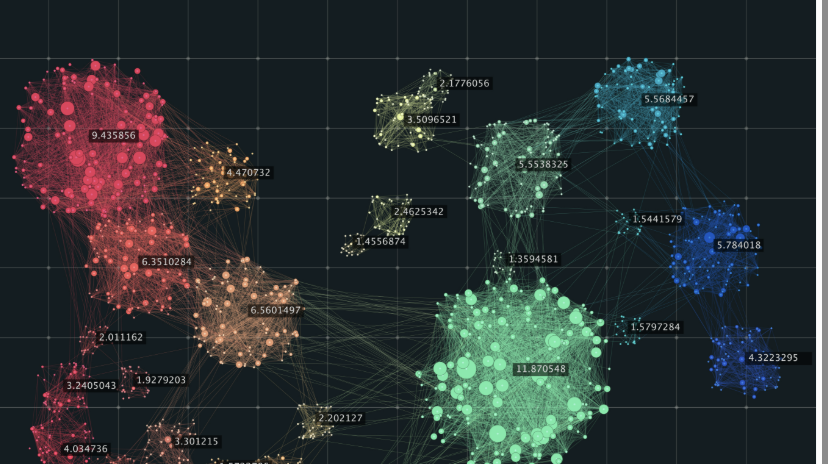

#K-means clustering

In machine learning, clustering is an unsupervised learning technique used to group data points based on their similarity. It aims to partition a dataset into clusters where data points within a cluster are more similar to each other than to points in other clusters. This process helps uncover hidden patterns and relationships in the data without relying on labeled data.

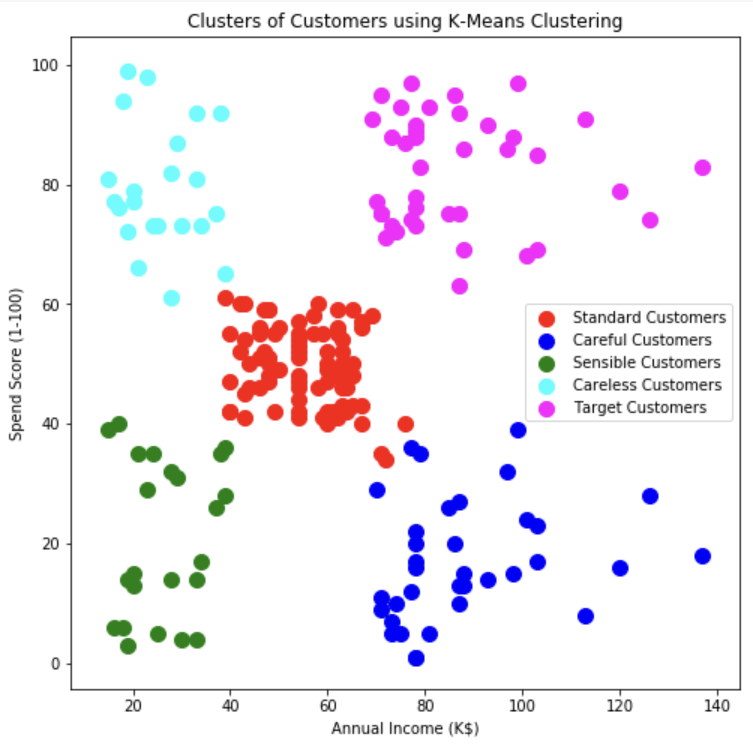

https://analyticsindiamag.com/deep-tech/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/

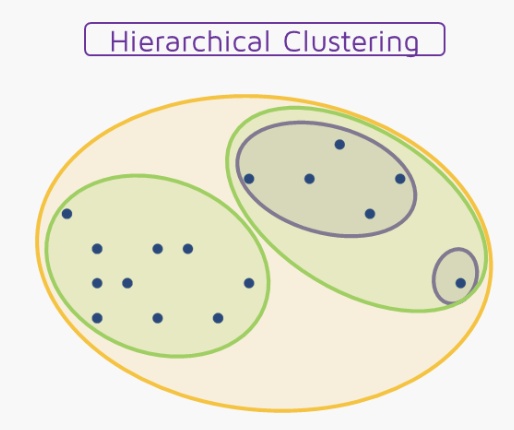

https://quantdare.com/hierarchical-clustering/

Hierarchical Clustering approach in which cluster boundaries are nested within other clusters

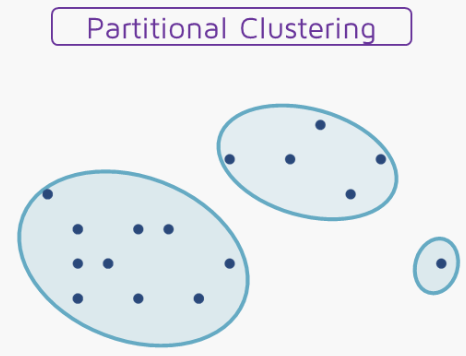

Partitional Clustering approach in which cluster boundaries are nonoverlapping

[**Overlapping Clustering**](https://www.mltut.com/hierarchical-clustering-in-python-step-by-step-complete-guide/)
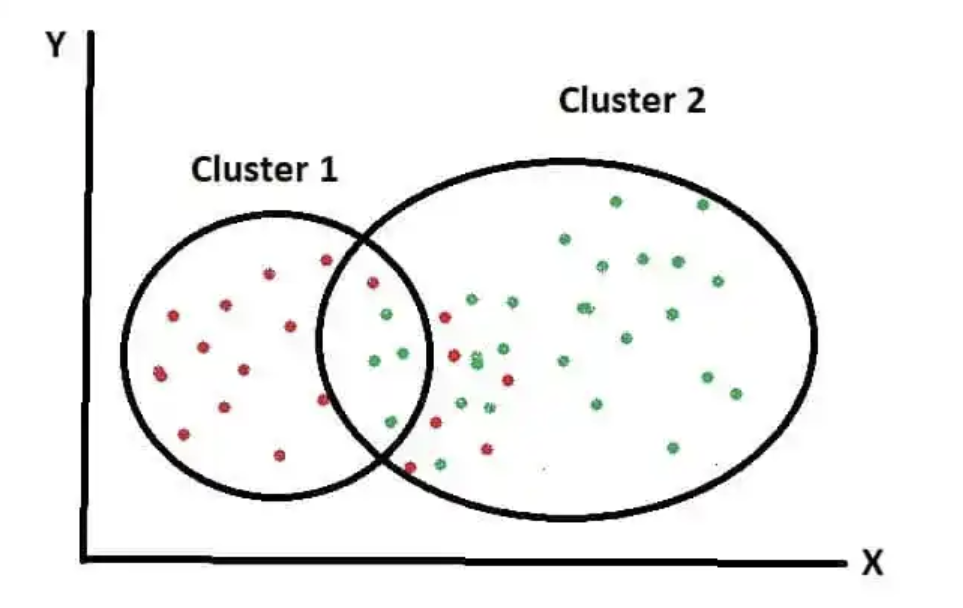

Clustering approach in which the boudary of one cluster can overlap with another

In [ ]:
#Check for Fuzzy clustering?


Density Based
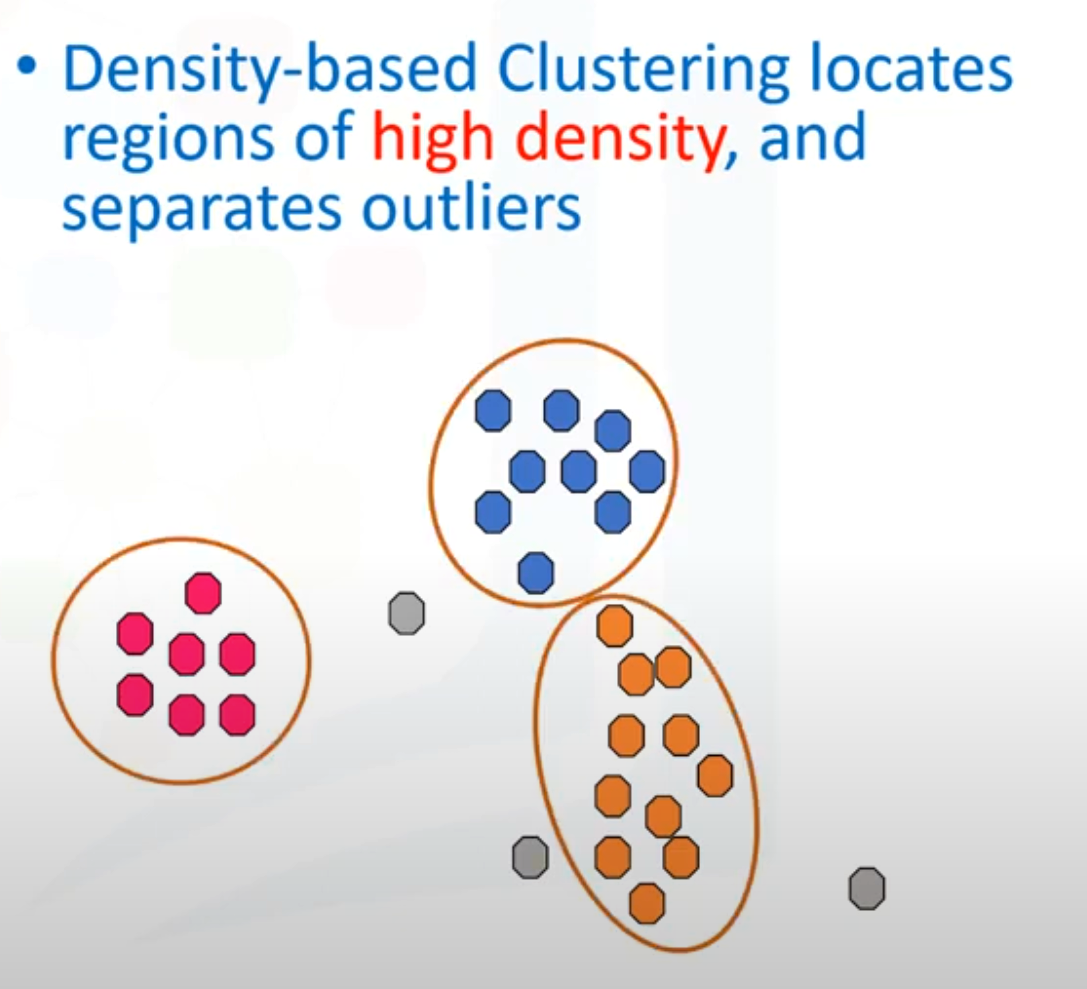

https://www.youtube.com/watch?v=6jl9KkmgDIw

K-means clustering is a partitional clustering approach. We started by determining how many cluster we want (k).
What do you think the challenge with this way? (Think about your data)

The algorithm uses a process called expectation maximization to assign every item within the dataset t oone and only one of **K non overlapping cluster based on similarity**

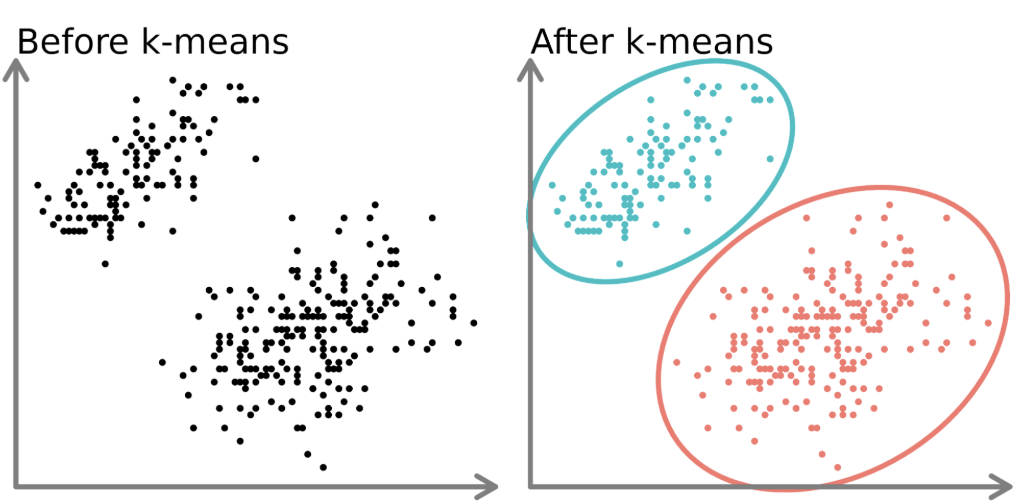

What's the value of k in this case?

How the similarity works?

Euclidean Distance:
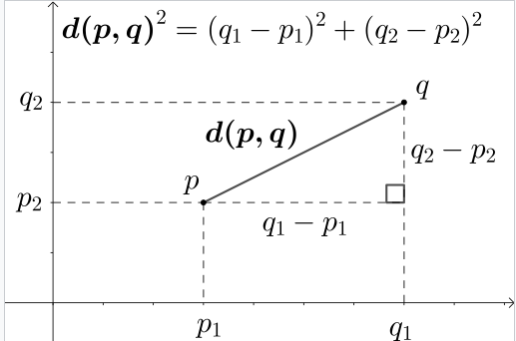


Cluster Centroid

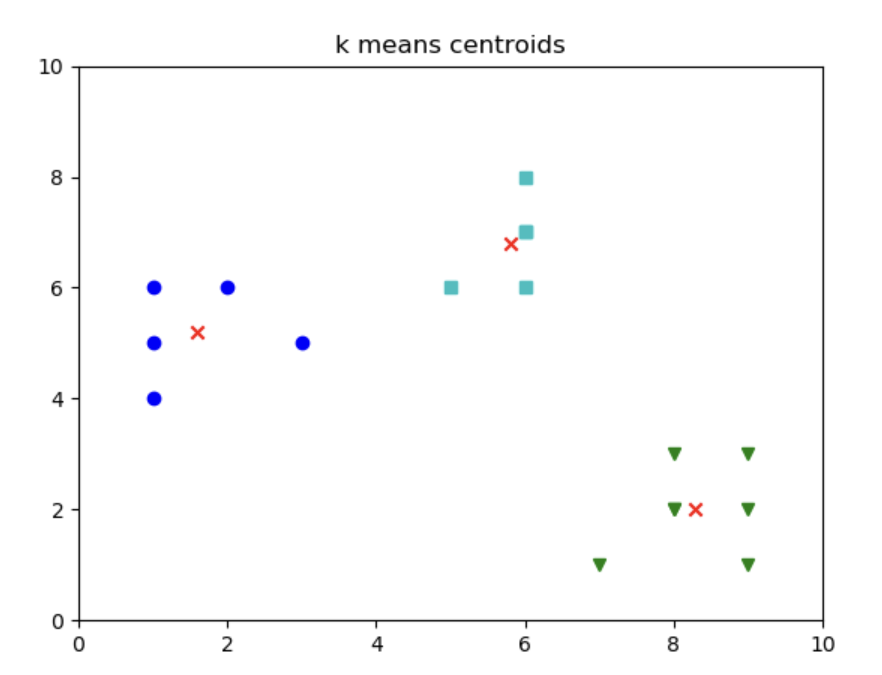


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

print("Here is X: ", X)
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans algorithm
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

Cluster centroid is the average position of the items currently assigned to a cluster.

Given 3 points (a1,a2),(b1,b2),(c1,c2) the cluster centroid is calculated as follows:

CC of (a,b,c) = ((a1+b1+c1)/3,(a2+b2+c2)/3)


#Choosing the right K?
- Priori knowledge or Business requirements
- Using rule of thumb k = sqrt(n/2) Does it make sense for you?
# Statistical Measures
- Elbow method

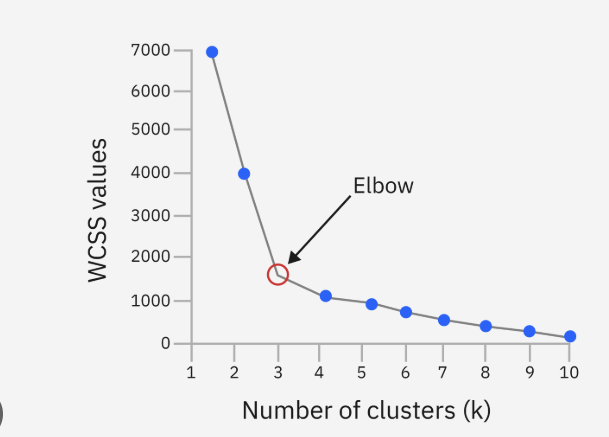

**The within - cluster sum of squares (WCSS)** quantifies the degree of similarity between items in a cluster

WCSS of a cluster is the sum of the distance from each item in the cluster to the cluster centroid

What can you say about the relation between k and WCSS? As you increase K, what happen to WCSS?

We can also say: WCSS(K=1) >>> WCSS(K=3) >>> WCSS (K=12)

Why? Choose the k at the most significant inflection point between WCSS and the number of clusters. This point is known as the elbow.



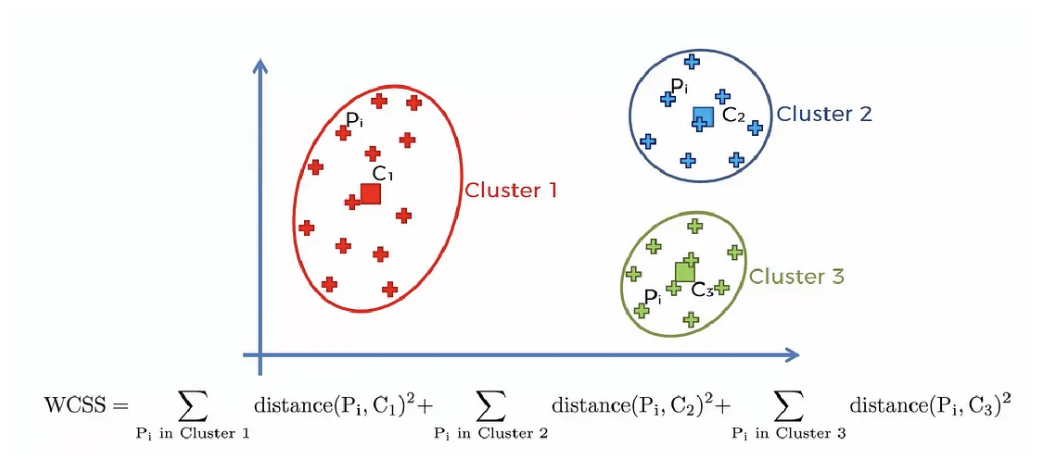

Another method we use to determine K is called the Average Silhouette Method.

Silhouette of an item is a measure of how closely the item is matched with other items within the same cluster and how loosely it is matched with items in neighboring clusters.


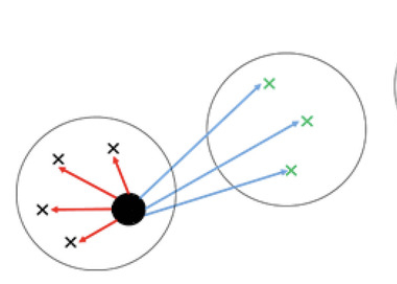


Calculate the average distance within the same clustering to specific point a(i), and the average distance between the same point and other items in closet cluster b(i).

**Silhouetter Coefficient (i) =**

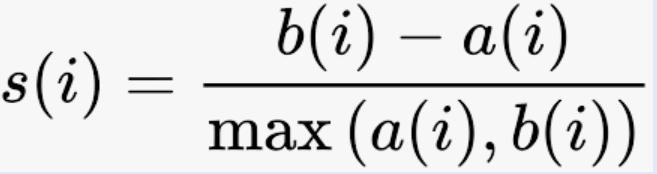

The higher the silhouette value of an item, the more likely that it is in the right cluster (value between -1 and 1)

If the result close to 1 implies the item is in the right cluster, while if it is close to -1 it means the item is in the wrong cluster.


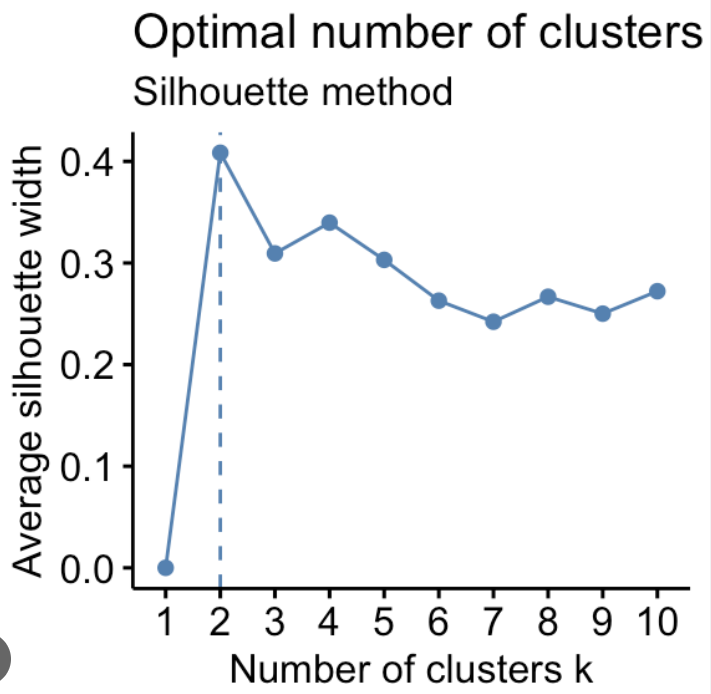

The Average Silhouette Method: The k value corresponding to the highest average silhouette represent the optimal number of cluster.

`Look for Calinski-Harabasz Score: Your homework! `

# Why K-means Clustering?

Which one is not right here?

- K-means clustering can be scaled to large data sets
- K-means clustering is useful for creating non-spherical clusters
- K-means clustering is very flexible and malleable algorithm
- k-means clustering is base on simple statistical principles

K-means clustering is not useful for creating non-spherical clusters. This means it is not well suited for creating clusters with complex shapes and diferent sizes.

What is not a weakness of k-means clustering?

- k-means clustering can be impacted by outliers
- has trouble working with data regions of varying denity
- only works with numeric data
- only works on small datasets (can be scaled to large data sets)

One objective of clustering is to ensure that the items within a particular cluster are as similar as possbile. This is also known as high "intr-class" similarity.


# Let's dive in

#1. Collect data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read file from GitHub
path ="https://raw.githubusercontent.com/DAPLearning2025/materials/refs/heads/main/Resources%20%26%20Data/Mall_Customers.csv"
df = pd.read_csv(path)
df.head(5)

In [ ]:
df.shape

In [ ]:
customer = df.copy()
customer.tail(5)

#2. Explor the Data

In [ ]:
customer.info()

In [ ]:
customer.describe() # we can also round the result
#customers.describe(include ='all').round(2)

In [ ]:
customer.isnull().sum()

In [ ]:
customer.dtypes

In [ ]:
#Renaming Annual Income (k$) with only Income
customer.rename(columns={'Annual Income (k$)':'Income'},inplace=True)
customer.rename(columns={'Spending Score (1-100)':'SpendingScore'},inplace=True)

In [ ]:
customer.head()

**Always a viual exploration of the dataset can provide us with some additional insight.**

In [ ]:
#Let's visual the data
sns.pairplot(customer)

In [ ]:
ax=sns.boxplot(x="Gender",y="Income",data=customer,palette="colorblind",hue="Gender")

In [ ]:
#Plotting scatter plot between Age and SpendingScore
ax = sns.scatterplot(x="Age", y="SpendingScore", data=customer, s=150)


In [ ]:
#Scatterplot between Age and Income
ax = sns.scatterplot(x="Age", y="Income", data=customer, s=150)

In [ ]:
# Visulize boxplot for gender and age
ax=sns.boxplot(x="Gender", y="Age",data=customer,palette="colorblind", hue="Gender")

In [ ]:
#ScotterPlot for Gener and Income
ax = sns.scatterplot(x="Income", y="SpendingScore", data=customer, s=150)


#3. Prepare the data

In [ ]:
customer[['Income','SpendingScore']].describe().round(2)

Look at the STD?  you need to standardize the income and the spending score to avoid any scalling issues. Look at STD and compare its value. In our case, both features have close STD.

https://www.geeksforgeeks.org/z-score-normalization-definition-and-examples/


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# customer_scaled = scaler.fit_transform(customer[['Income','SpendingScore']])
# customer_scaled=pd.DataFrame(customer_scaled, columns=['Income','SpendingScore']).head()
# customer_scaled.describe().round(2)

In [ ]:
customer_scaled=customer[['Income','SpendingScore']]
customer_scaled.head()

#4. Create the Clusters


In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, n_init=25, random_state=1234)

In [ ]:
km.fit(customer_scaled)

In [ ]:
km.labels_ # This result in a NumPy array of cluster assignemnts. The cluster assignements correspond to the order of instances in the customer scale data set.

In [ ]:
km.inertia_  #WCSS This is the total within-cluster sum of squares for the clusters.

#5. Evaluate and Visualize the Clusters

In [ ]:
pd.Series(km.labels_).value_counts().sort_index()

In [ ]:
km.cluster_centers_

In [ ]:
#Let's interpret the cluster centers --> Create da dataframe
cluster_centers=pd.DataFrame(km.cluster_centers_,columns=['Income','SpendingScore'])
cluster_centers

In [ ]:
# Set the figure size
plt.figure(figsize=(10,10))

#Pot the Clusters
ax=sns.scatterplot(x='Income',y='SpendingScore',data=customer_scaled,hue=km.labels_,palette='colorblind',
                                                                 alpha=0.8,
                                                                 s=150,
                                                                 legend=False)

#Plot the Centroids
ax=sns.scatterplot(data=cluster_centers,
                    x="Income",
                    y="SpendingScore",
                   hue=cluster_centers.index,
                   palette='colorblind',
                   s=600,
                   marker='D',
                   ec='black',
                   legend=False)

#Add Centeroid labels
for i in range(len(cluster_centers)):
  plt.text(x=cluster_centers.Income[i],
           y=cluster_centers.SpendingScore[i],
           s=i,
           horizontalalignment='center',
           verticalalignment='center',
           fontsize=15)


#6. Choose the right number of clusters

**The Within Cluster Sum of Squares (WCSS)**

In [ ]:
#picking the right k
wcss=[]
for k in range(2,11):
  km=KMeans(n_clusters=k, n_init=25, random_state=1234)
  km.fit(customer_scaled)
  wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index=range(2,11))

plt.figure(figsize=(8,6))

ax=sns.lineplot(y=wcss_series, x=wcss_series.index)
ax=sns.scatterplot(y=wcss_series, x=wcss_series.index, s=150)
ax=ax.set(xlabel='Number of Clusters (k)',
          ylabel = "within Cluster Sum of Squares (WCSS)")



**The Average Silhouette Score**

In [ ]:
#let's find k using the average silhouette score
from sklearn.metrics import silhouette_score

silhouette=[]

for k in range(2,11):
  km=KMeans(n_clusters=k, n_init=25, random_state=1234)
  km.fit(customer_scaled)
  silhouette.append(silhouette_score(customer_scaled, km.labels_))

silhouette_score_series = pd.Series(silhouette, index=range(2,11))

plt.figure(figsize=(8,6))

ax=sns.lineplot(y=silhouette_score_series, x=silhouette_score_series.index)
ax=sns.scatterplot(y=silhouette_score_series, x=silhouette_score_series.index, s=150)
ax=ax.set(xlabel='Number of Clusters (k)',
          ylabel = "Average Silhouette Score")


#7. Analyze and Interpret the Clusters

In [ ]:
km=KMeans(n_clusters=5, n_init=25, random_state=1234)
km.fit(customer_scaled)

In [ ]:
cluster_centers=pd.DataFrame(km.cluster_centers_,columns=['Income','SpendingScore'])
cluster_centers

In [ ]:
#Set the figure size
plt.figure(figsize=(10,10))

#plot the cluster
ax=sns.scatterplot(x='Income',y='SpendingScore',data=customer_scaled,hue=km.labels_,palette='colorblind',
                                                                 alpha=0.8,
                                                                 s=150,
                                                                  legend=False)

#Plot the Centeroids
ax=sns.scatterplot(data=cluster_centers,
                    x="Income",
                    y="SpendingScore",
                   hue=cluster_centers.index,
                   palette='colorblind',
                   s=60,
                   marker='D',
                   ec='black',
                   legend=False)

#Add Centeroid labels
for i in range(len(cluster_centers)):
  plt.text(x=cluster_centers.Income[i],
           y=cluster_centers.SpendingScore[i],
           s=i,
           horizontalalignment='center',
           verticalalignment='center',
           size=15,
           weight='bold',
           color='white')


In [ ]:
customer['Cluster'] = km.labels_.tolist()
customer.head(20)

In [ ]:
customer.tail(10)

In [ ]:
#dummies our data set
customer_dummies = pd.get_dummies(customer, columns=['Gender'], dtype=int)
customer_dummies.head(10)

In [ ]:
#aggregate our new dataset
customer_dummies.agg({
    'Gender_Female':'mean',  # 56% of femal
    'Gender_Male':'mean',   # 44% male
    'Age':'median',
    'Income':'median',
    'SpendingScore':'median'
}).round(2)

In [ ]:
#Let's get same statistics insight grouping by cluster
customer_dummies.groupby('Cluster').agg({
    'Gender_Female':'mean',
    'Gender_Male':'mean',
    'Age':'median',
    'Income':'median',
    'SpendingScore':'median'
}).round(2)

Explain what we have found

From the business perspective, which group we should invest in more?

# Next Steps:

1.   ML in Python: Decision Trees
2.   Natural Language Processing (NLP)
3. What's Deep Learning? Neural Network?

